#**CURRENT STEERING DIGITAL TO ANALOG CONVERTER**

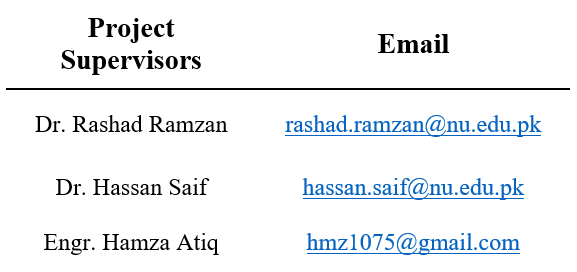

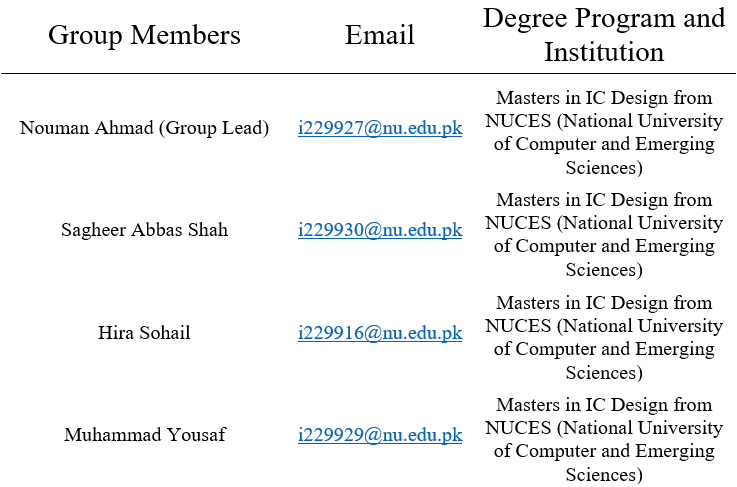

##**Abstract**


A 10-bit segmented current steering digital-to-analog converter (DAC) is presented in this proposal.The specifications include an update rate of at least 10 MS/s, number of bits greater than 10, intermodulation distortion better than -60 dB, aligned noise spectral density with the arbitrary waveform generator (AWG) path, and a DAC bandwidth linked to the DAC's Nyquist bandwidth. To meet these requirements, a segmented current steering DAC is proposed, which combines the advantages of both binary and unary weighted DACs. The MSBs are implemented using thermometer coding(unary), and the LSBs are implemented using binary coding. Maximum DNL calculated is 0.39 LSBs and INL is -0.83 LSBs. The DAC is designed and implemented on 65nm PDK by TSMC, with a sampling frequency of 100 MHz. For the **Opensource Tools**, a 6-bit DAC is implemented on **XSCHEM** based on the same topology for demonstration. The results are as per expectations and all the 64 levels are in monotonic manner.

##**Motivation**

Open-source tools for IC design are the future of the industry and participation in such competitions is valuable to showcase skills and knowledge in this area. By working on open source tools individuals can improve the quality and availability of open source tools to IC design community. Working on open source tools can provide oppurtunities for collaboration and exposure to new ideas and approaches towards this field.It can provide hands-on experience with different tools and techniques, and can be a valuable addition to a designer's skill set.

##**Problem Statement**

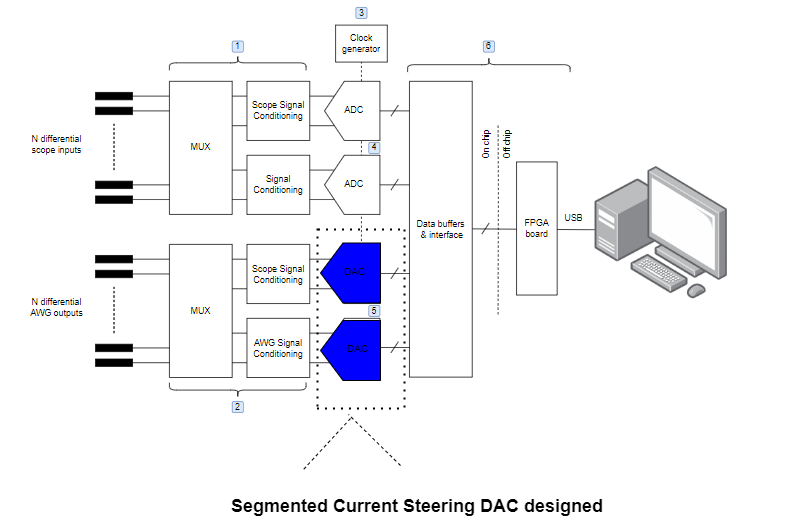

*Fig 01: Targeted Project*

A Digital-to-Analog converter is required that takes input digital data and passes its analog output to an arbitrary waveform generator that allows the macro's user to direct the DAC resources to a number of different test points within the DUT. The requirement is to design an efficient DAC with respect to various parameters such as area. Desired specifications are:


<center>

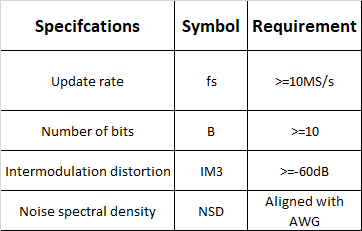

*Table 01: Specifications of DAC*

##**Proposed Solution**

The proposed solution for a digital-to-analog converter for the mentioned requirements is a 
segmented current steering DAC. Current steering DAC is very efficient and opted for because of the fact that it provides higher resolution with less consumption of power. Also, it has higher speed of conversion. Segmented DAC offers advantages in the form of reduction in glitches and uniform rise in output which results in reduction of nonlinearity error (INL and DNL).

###**Segmented Current Steering DAC**

Current Steering DACs are classified in two ways: Binary weighted and Unary weighted DACs. In binary-weighted DAC, N number of current sources are required for N- bit. It has advantages in the form of less no. of current sources and limitations in the form of significant glitches due to major transitions of bits [1].

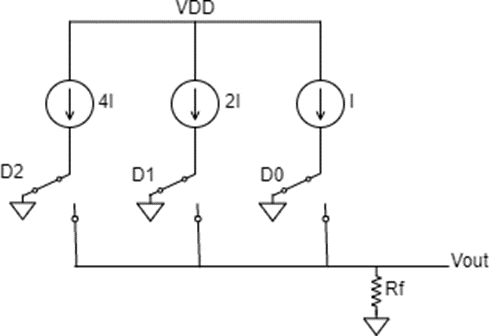

*Fig 02: 3-Bit Binary Weighted DAC*

In unary weighted DAC, 2^ N-1 current sources are required to convert the N bit into an analog signal. Each current source is having the same current value in this case. The advantage is that there will be no glitches as only a one-bit change exists. But it requires more number of current sources which results in more area.

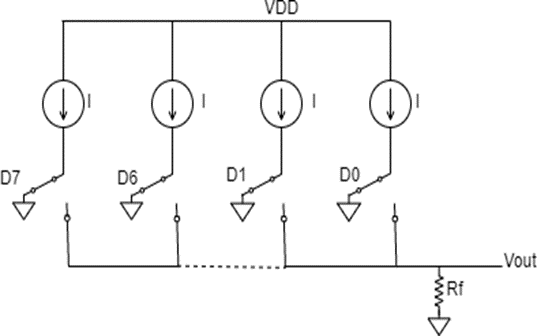

*Fig 03: 3-bit Unary Weighted DAC*

###**Thermometer Coded 6 Bit MSBs**

A thermometer DAC digitally recodes input values to the equivalent thermometer code. A thermometer code has 𝟐 (𝑵−𝟏) digital inputs to represent 𝟐 𝑵 digital values. Thermometer DAC reduces glitch noise, improves DNL, and guarantees monotonicity because one bit is changed at the moment. In our design 6 MSBs are implemented using thermometer coding. To select which the current cell is on at the moment, the matrix architecture is utilized that uses fully digital operation. For MSBs, to select each of the arrays in the current matrix, 3 bits of 6 MSBs are coded. To select the matrix row and matrix columns two 3 bits thermometer encoders are applied. Also, the local decoder is needed to specify which one of the matrix cells is on at the same time.


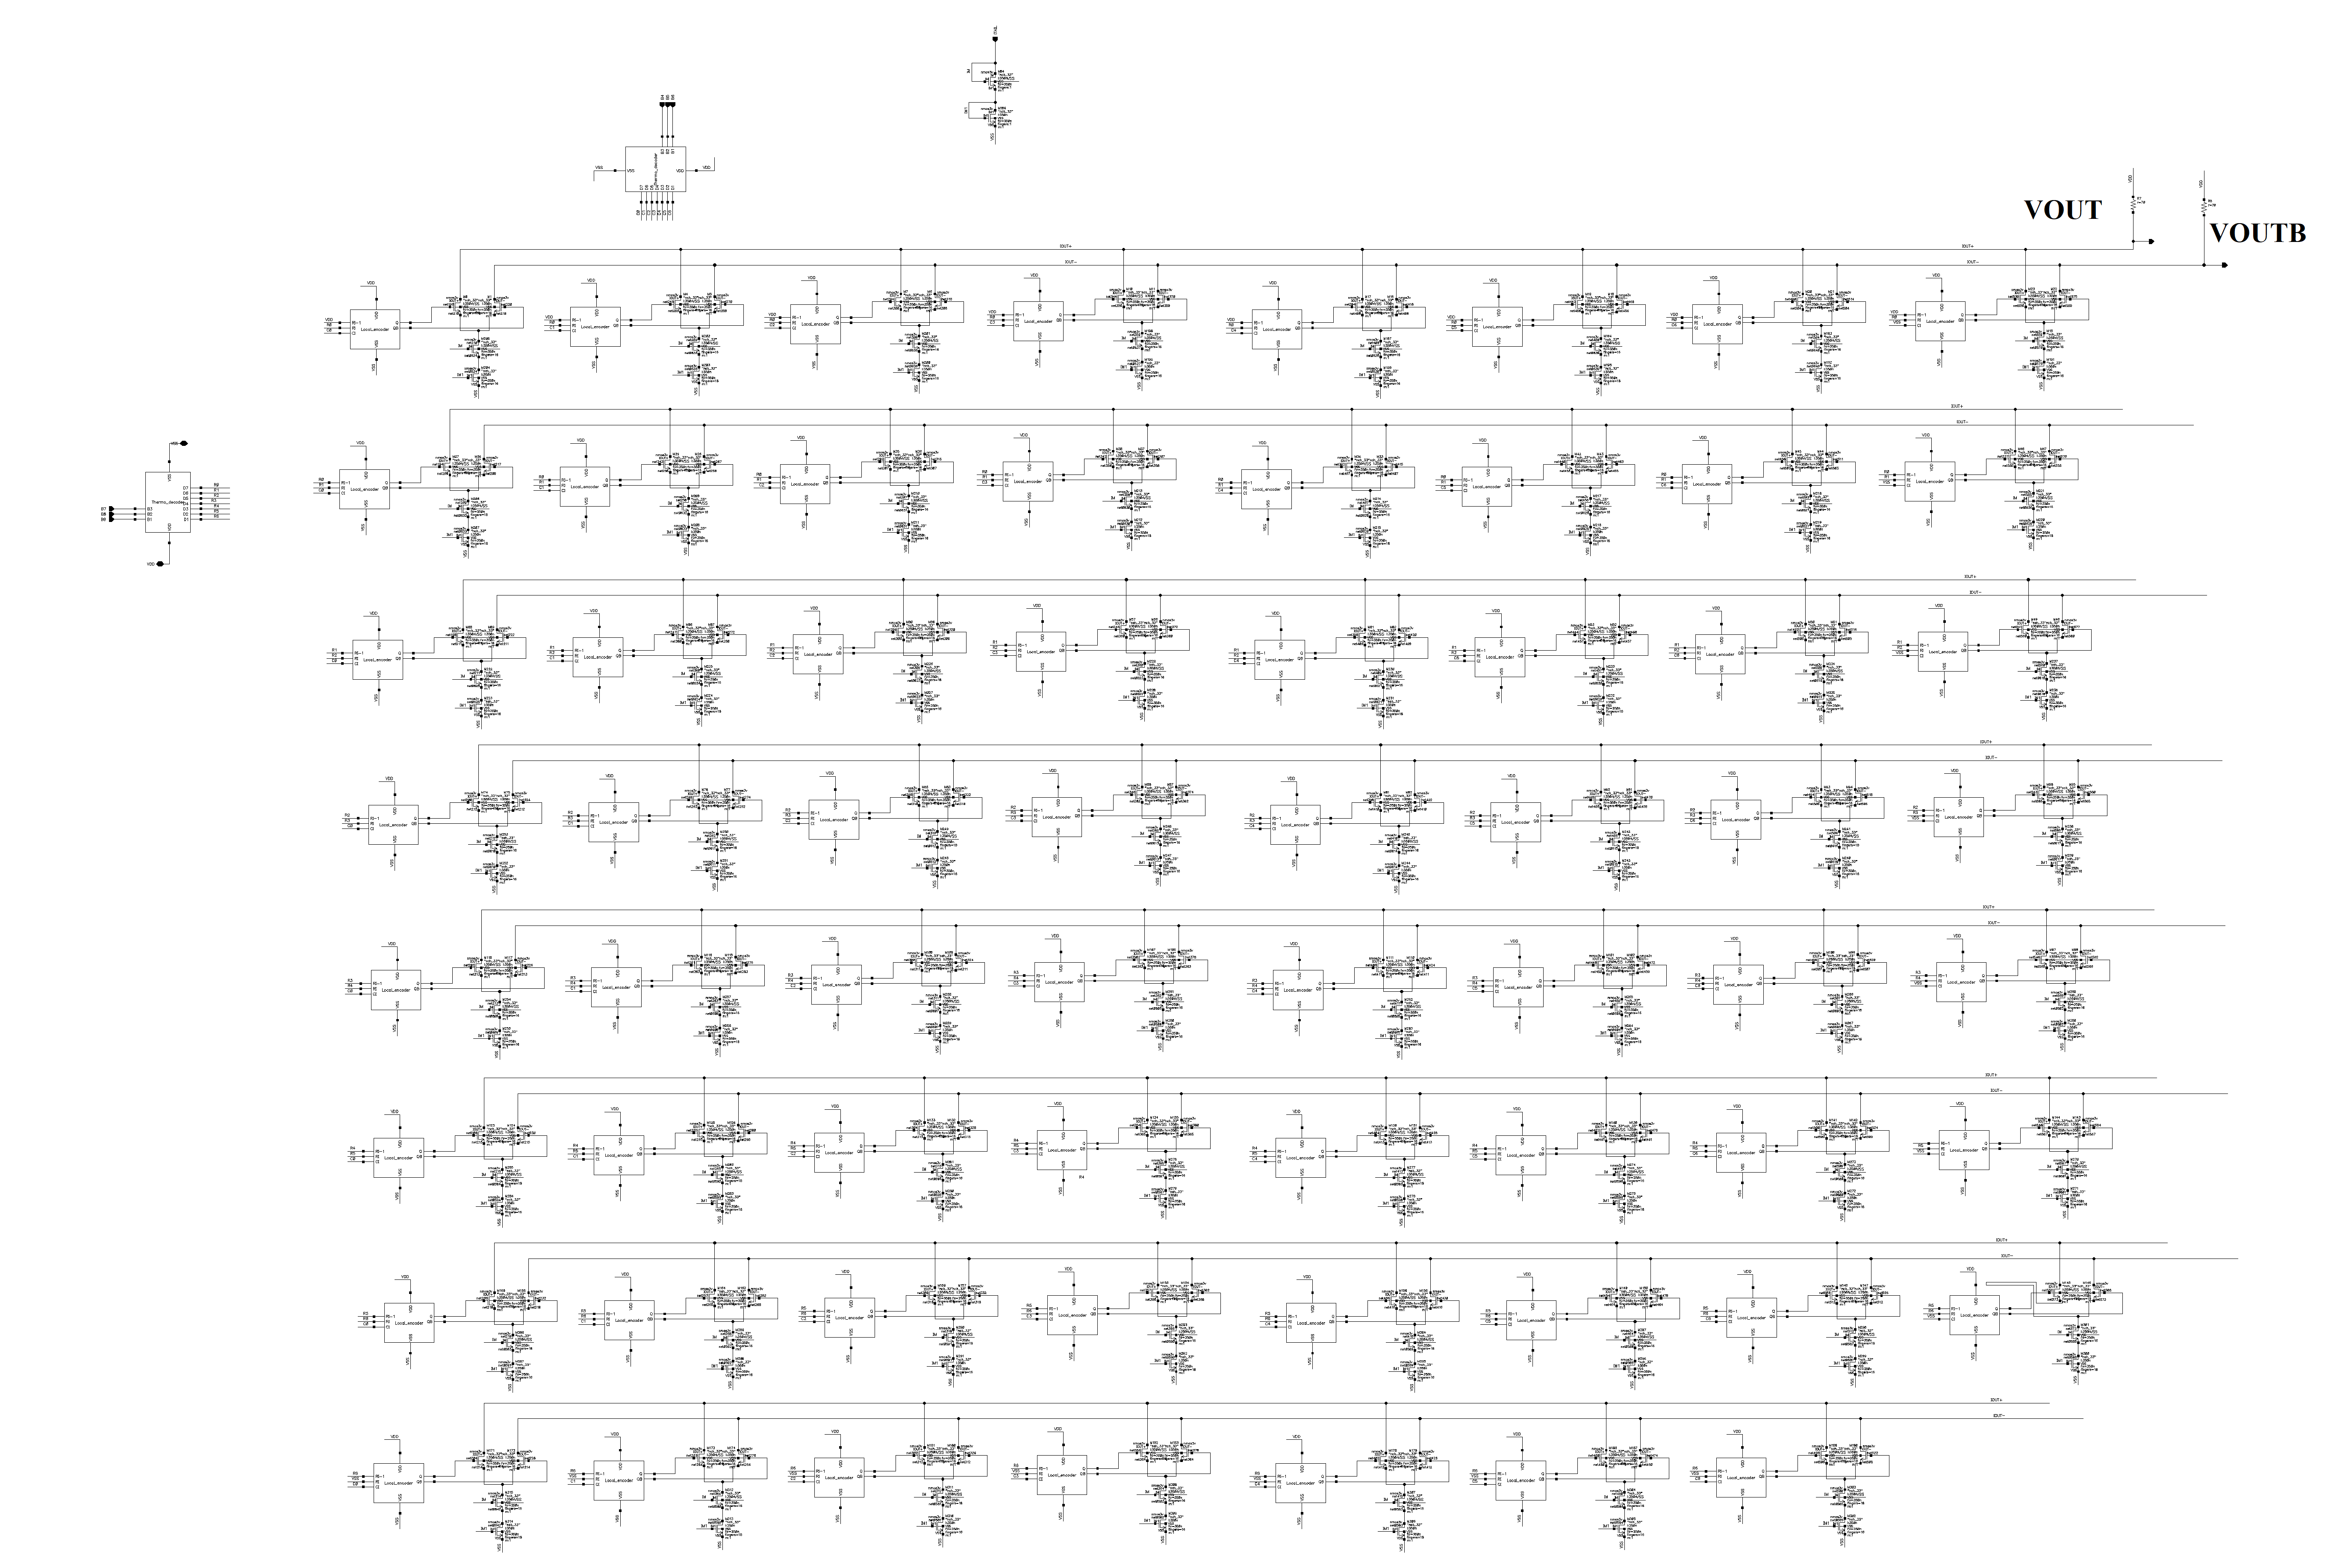

*Fig 04: Schematic of 6-Bit MSB*

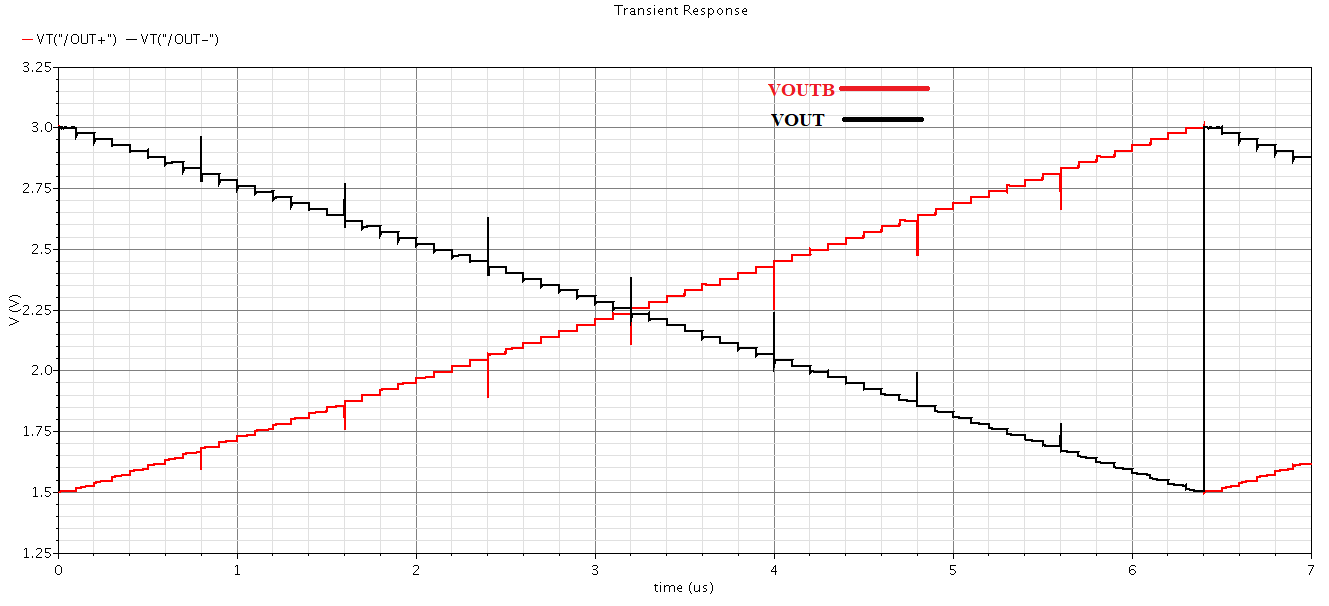

*Fig 05: Simulation Results for Thermometer coded 6-Bits*

Above simulation shows the differential output of Thermometer coded DAC having 64 levels. All levels are uniform and monotonic.

####**Thermometer Decoder**

Two 3 bits’ thermometer decoders are used, one of them addresses the column and another addresses the row in the matrix of current cells. All logical gates are generated with the NAND gate for lower rise and fall time. To synchronize the outputs, a buffer is used as a delay element.

####**Row and Column Decoder**

Column and Row decoder selects the column and row number to accurately turn on a cell according to the bit pattern given at the input. These are just 3-bit thermometer decoder. Schematic of row and column decoder is attached below:
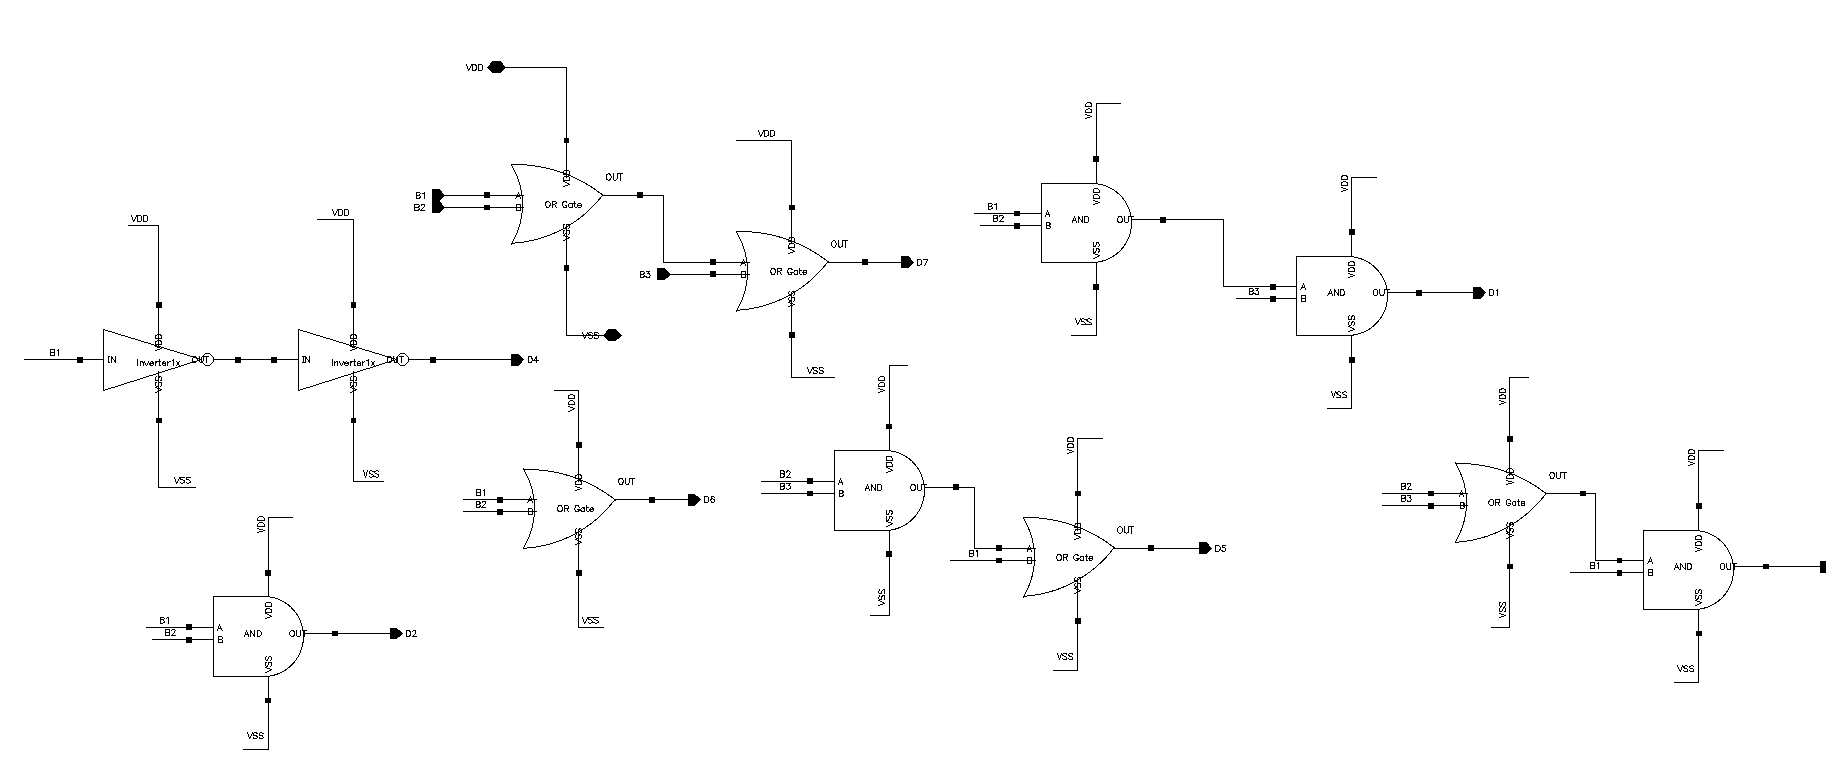

*Fig 06: Schematic of Row and Column Decoder*



####**Local Encoder**

To select which of the current cells in the matrix are on simultaneously, the local encoder is needed to feed the current switch. Latch is used to store switch situations. Q is logic one when both column-i and row-i and also rowi-1 is logic one. 

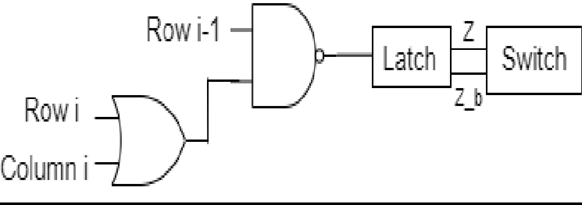

*Fig 07: Local Encoder Block Diagram*

This local encoder is implemented with each and every switch of thermometer coded array. Cadence implementation of local encoder is attached below.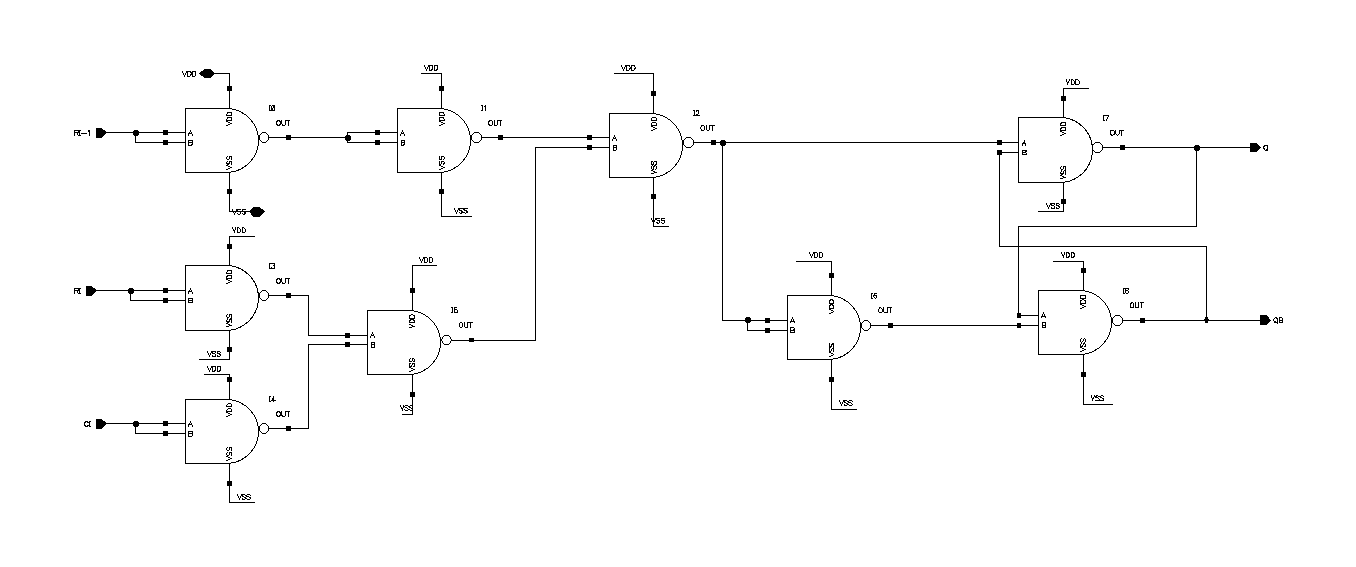

*Fig 08: Schematic of Local Encoder*

###**Binary Coded 4 Bit LSBs**

Binary scaled DAC combines binary weighted circuit quantities (currents, resistors, capacitors, etc.) under digital control to realize an analog quantity. It is hardware efficient but is subjected to nonlinearities so is used for the implementation of LSBs. Binary coding uses progressive current sources that switch current to output or GND. In our design 4 LSBs are implemented using a binary approach.

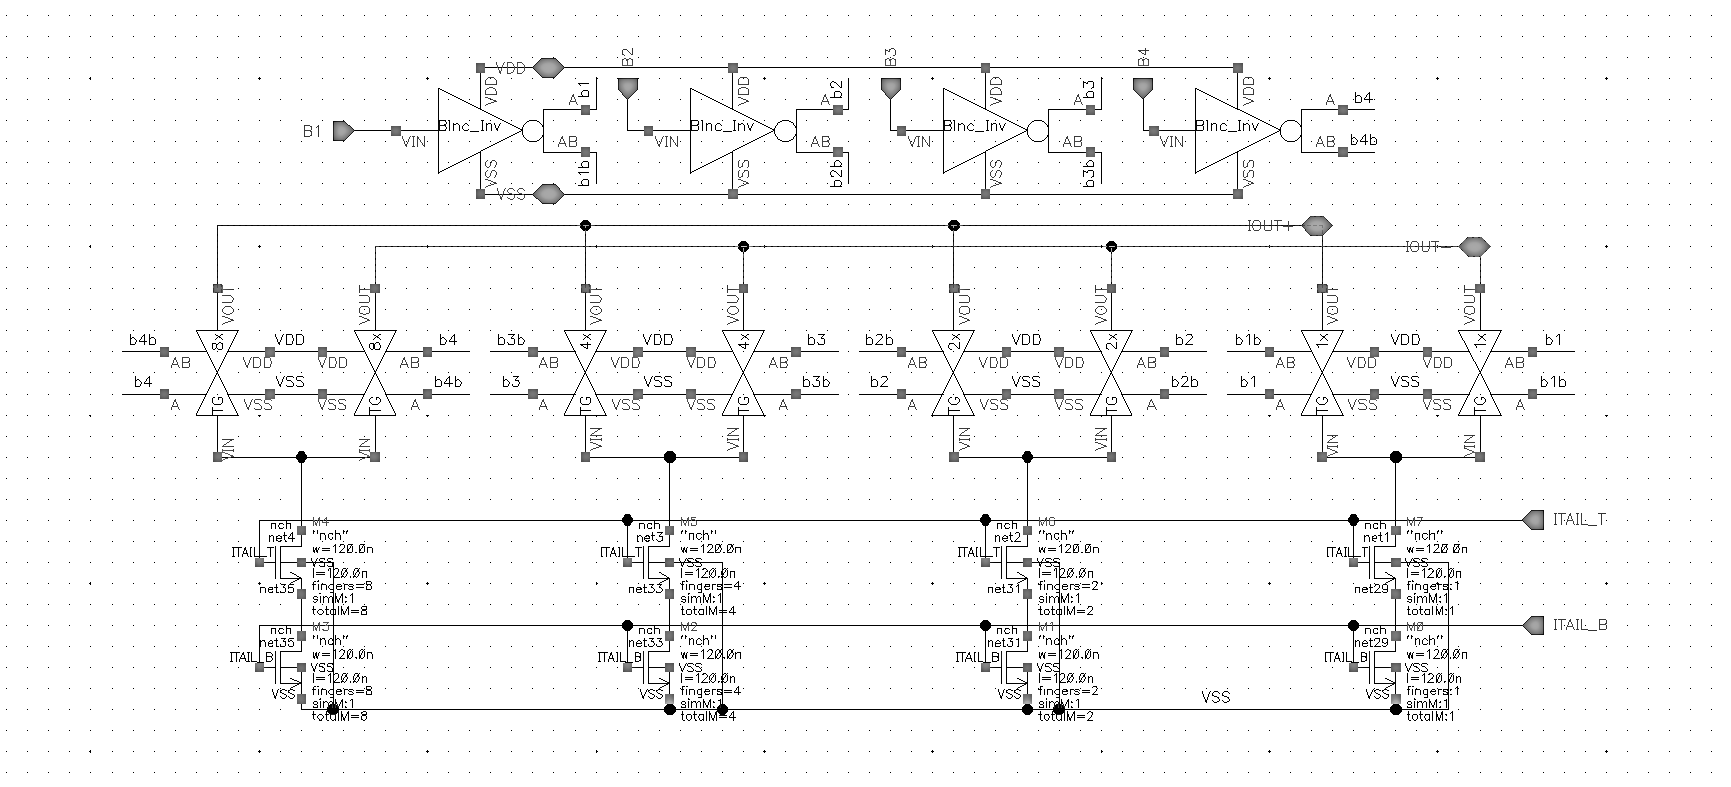

*Fig 09: Schematic Diagram for 4 Bit LSBs*

As the 4 LSBs are binary decoded an architecture is needed having progressive sizing of the cascoded current mirrors. Control in **W/L** ratio is required here as well like the MSBs. The first branch will be same as the reference source (**1x of the reference current**). The second and further brnaches sizing will be varried in **2^N times the reference current** i.e. second branch will produce **2x current**, third will produce **4x current** and the last branch of LSBs Binary DAC will produce **8x current** as compared to the reference current.

####**Differential Switch with Cascode Current Mirror**

Differential switch with cascode current mirror is utilized to have a more constant current due to the VDS variation. Also, cascode technique results in higher output resistance. If a single MOS is used as switch, variation of the current sink from zero to I takes more time, especially for larger current sinks. To solve that differential switch is used. The switches are controlled by the pulse connected to the gate.

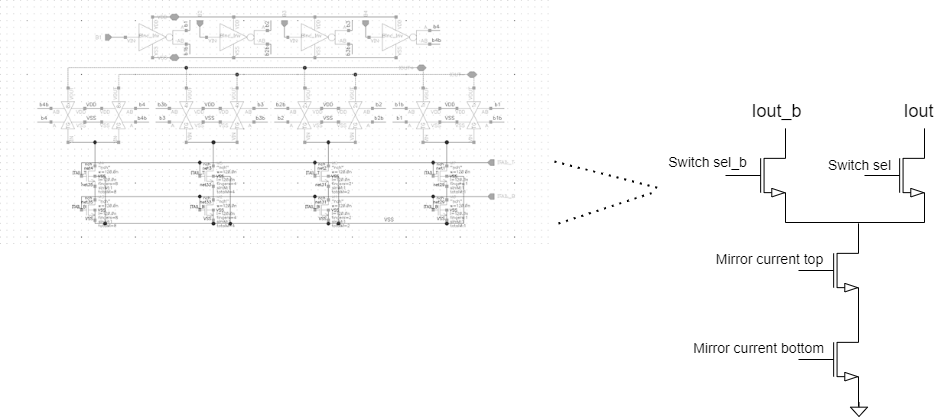

*Fig 10: Differential switch with cascode current mirror*

###**Band-Gap Reference**

A bandgap voltage reference is designed to provide a stable and accurate current reference to DAC. In this design, Low Voltage Biased Cascoded Band Gap Current Reference is implemented to provide a fixed current of 10uA to DAC [1].The topology of the circuit includes a self-biased supply-independent cascoded current mirror which is responsible for the same current and same voltage at two different nodes required for making our current reference temperature variation independent as well. Our design includes:

•	Cascoded Structure for Self-biased voltage and current supply.

•	Designing PTAT and CTAT for temperature variation independence.

•	Designing Start-up circuits to avoid zero-current biasing.

For absolute stability low voltage wide swing, cascode mirror is used which not only provides high resistance but also satisfies the voltage biasing requirement of all transistors. Although the current is independent of sizing yet to reduce process variation errors inversion coefficient is kept greater than ten to remain in the strong inversion region[1].


  

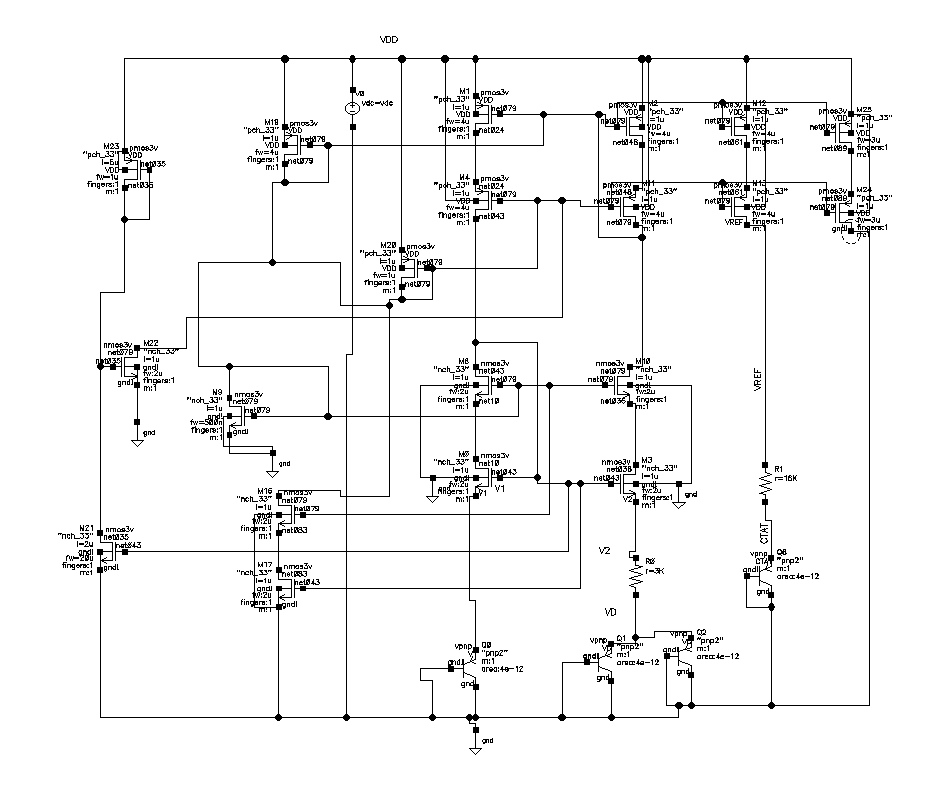

*Fig 11: Schematic of BGR*

This DAC is tested using this BGR when the reference current was around 20uA. But this BGR is just to make this DAC works with reference circuits as well rather than just connecting an ideal source. the corner analysis performed on 65nm TSMC PDK is as follows:

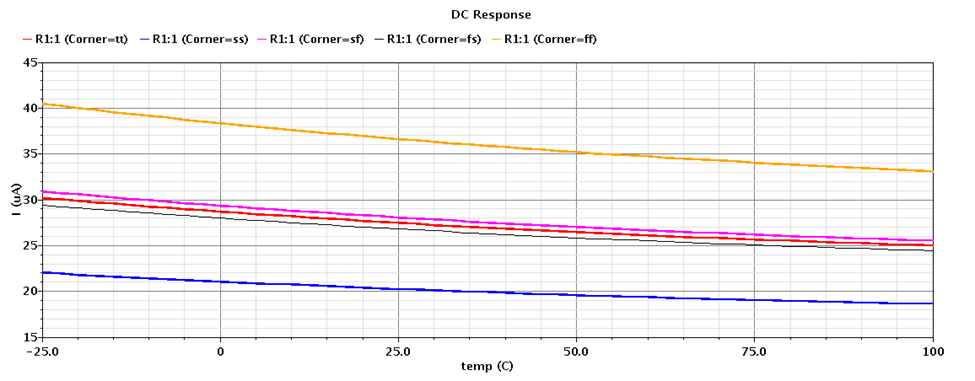

*Fig 12: Corner analysis for BGR*

###**10-Bit Segmented Current Steering DAC**

A 10-bit segmented ccurrent segmented DAC is designed. 6-bit MSBs implemented with thermometer decoding technique and 4-bit LSBs are implemented using binary coding, are synchronized together in a 10-bit segmented current steering DAC [2]. For a matrix output, column encoder has 3 pins i.e. B7, B8 and B9 while row encoder has 3 pins that are B4, B5 and B6. The output of matrix is a a differential current i.e. Iout+ and Iout- passing through R1 and R2 respectively. 4 pins, B0, B1, B2 and B3 are designated for LSBs. The output pins of MSBs and LSBs are shorted together. Output currents from binary weighted and matrix cells are summed and passed through the resistors (load) to generate corresponding DAC output. Each matrix cell is a local encoder consisting of a latch. All digital processing units are implemented using NAND standard logic gates, resulting in less propagation delay time and higher operating frequency. The block diagram of the segmented current steering DAC is as follows:

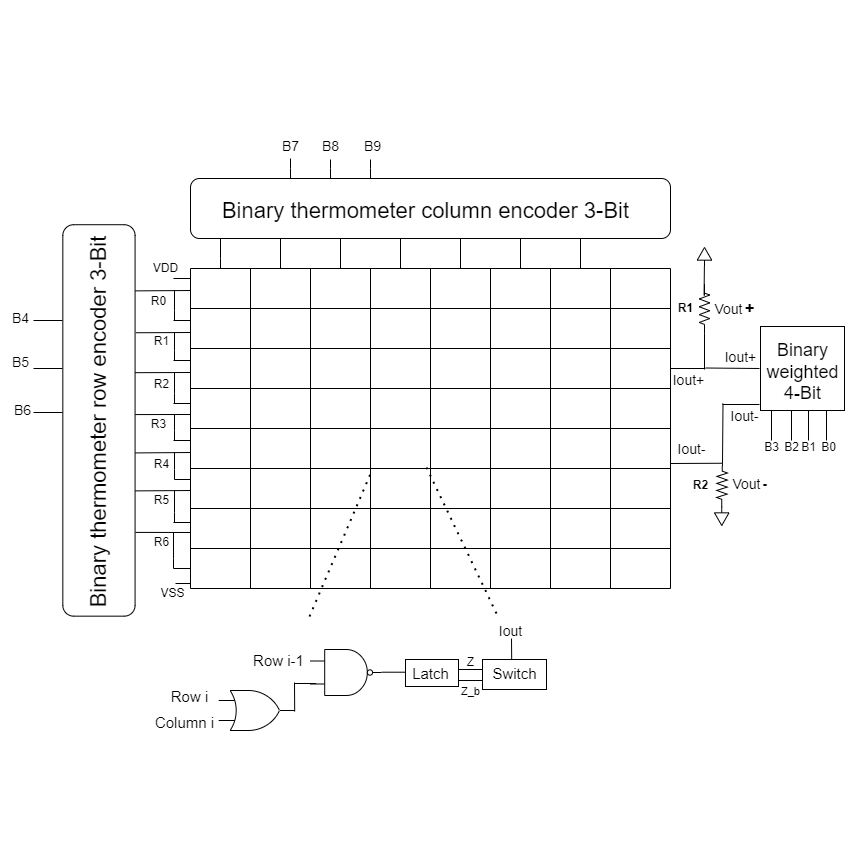

*Fig 13: Block Diagram for 10 bit Segmented Current Steering DAC*

##**Simulations and Analysis**

###**DAC Output**

The following figure shows the differential output for Segmented DAC when a ramp input signal was given in terms of bits. Simply bits in a truth-table like fashion is generated. The following output was obtained after the simulation of all the combinations:

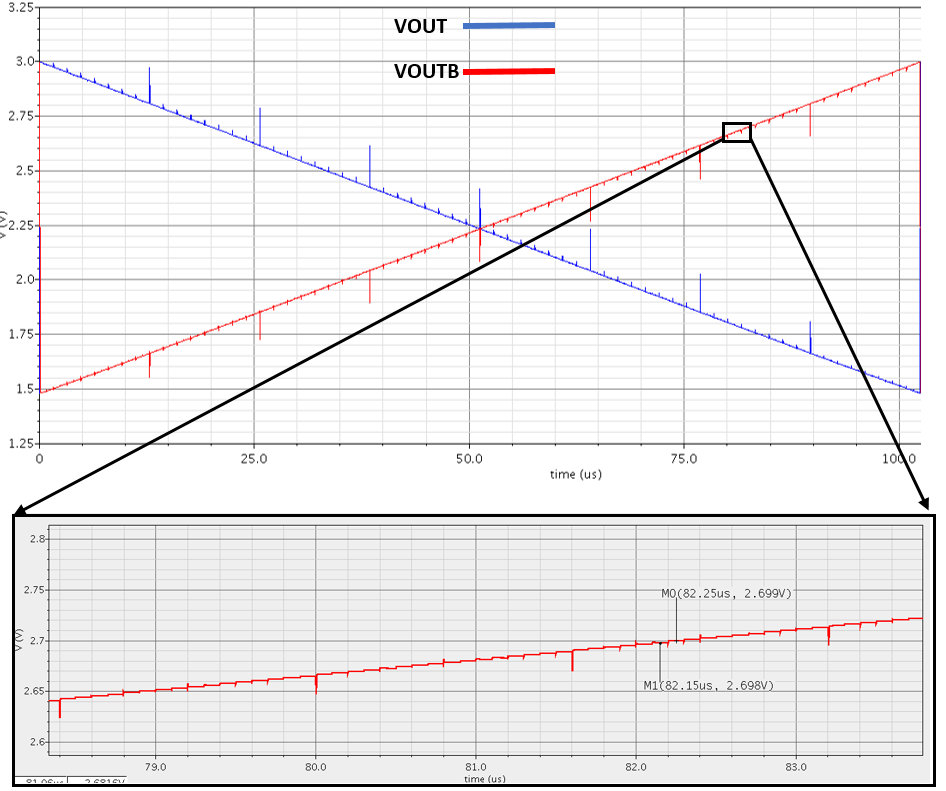

*Fig 15: Ramp Output*

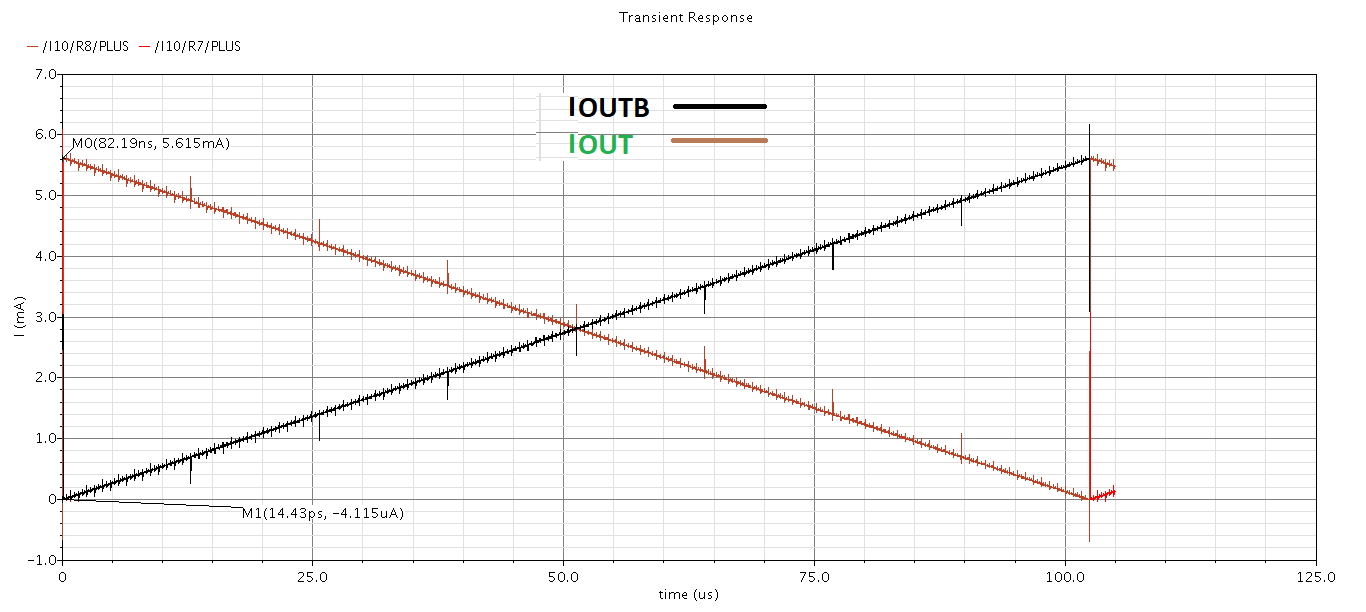

*Fig 16: Differential Output Current of DAC*

### **INL Result of DAC**



INL stands for Integral Nonlinearity and is a measure of performance in digital-to-analog (DAC) and analog-to-digital (ADC) converters. In DACs, it is a measure of the deviation between the ideal output value and the actual measured output value for a certain input code. It describes the deviation between the ideal output of a DAC and the actual output of a DAC, where offset error and gain error have been calibrated out of the measurement. INL is the most valuable specification to consider for an application that requires extremely high precision. The maximum INL Calculated in our case is -0.83 LSBs.

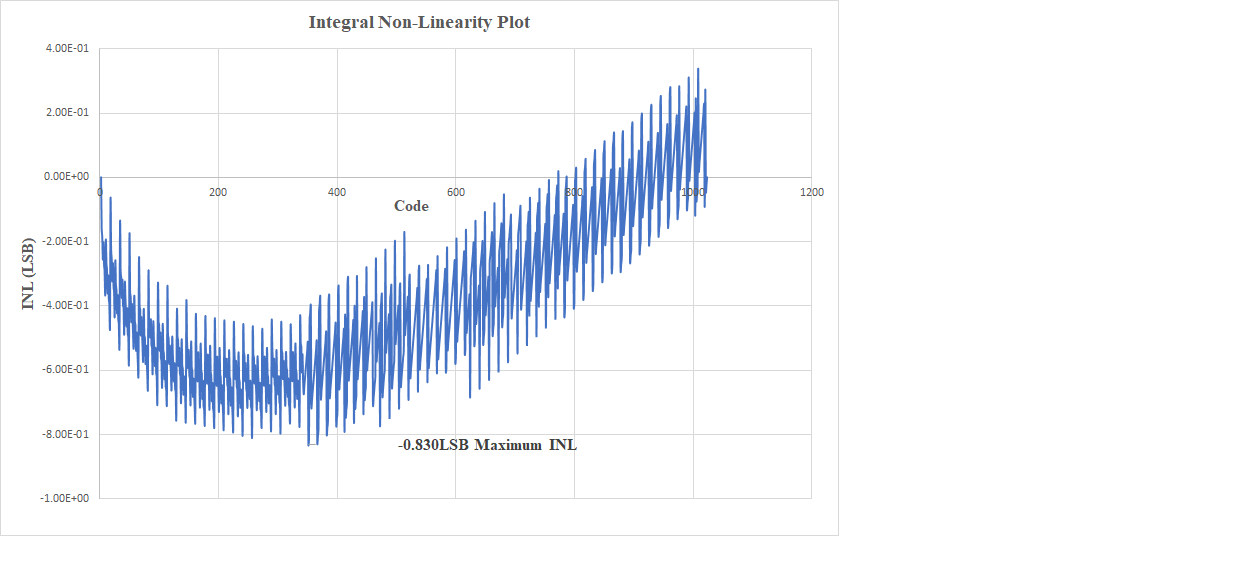

*Fig 17: INL Calculated*

### **DNL Result of DAC**

DNL stands for Differential Non-Linearity and it is a measure of the deviation between two analog values corresponding to adjacent input digital values in a digital-to-analog converter (DAC) or an analog-to-digital converter (ADC). It is a way to characterize the difference between two successive voltage levels that a DAC produces. The DNL is the maximum deviation of the output steps from the ideal analog LSB value. In our case, maximum DNL calculated was observed as 0.39 LSBs.

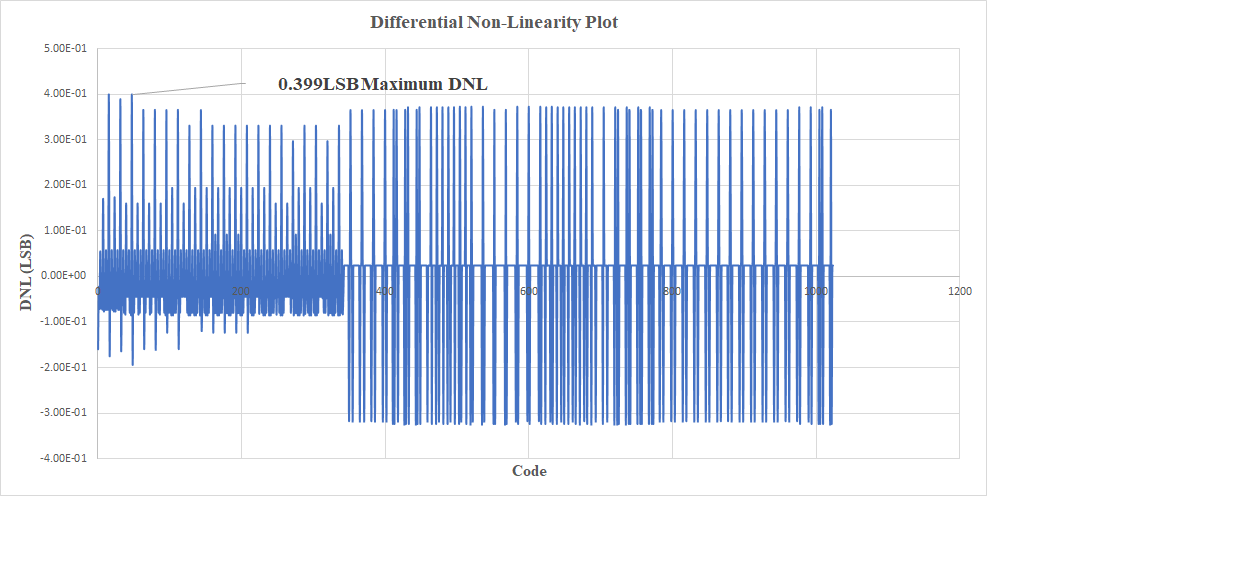

*Fig 18: DNL Calculated*

Following table summarizes the results of this purposed design of current steering DAC:
##**Achieved Results**
<center>

**Table 2:** Summary of Achieved Results
<table>

|Specification|Achieved|
|:|:|
|Update Results|&ge; 10MS/s|
|No. of Bits|=10|
|INL|-0.830 LSB|
|DNL|0.399 LSB|
|Minimum Current|-4.115 uA|
|Maximum Current|5.615 mA|
</table>
</center>

###**Steps for Calculation of INL and DNL**

INL and DNL calculations for full scale waveform are performed on excel sheet using formulas. At first, samples from cadence are taken using table tool in csv format and paste that data in excel sheet. Our Vref=3V and No. of bits=1024. Hence our effective number of bits are 10.Then VLSB is calculated which is Vref/2^N, comes out to be 2.93mV in our case.Then offset error is calculated using the following formula: 


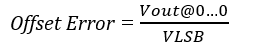

Offset Error in our case is about 0.0207LSB. After this, Gain Error is calculate by using following formula. Which is almost 0.979LSB in our case

Then generated Error free data (free from offset error and gain error) by following equations: 

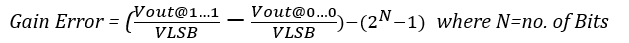

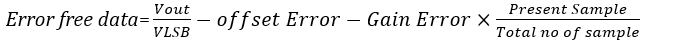

After having error free data, subtract the error free data from exact linear line. The answer gives us INL in units of LSB. For calculation of DNL, subtract the next INL value from previous INL value. 


###**DAC Output Corresponding to Sinusoidal Input**

Aside from the above ramp output, DAC is also fed with the sinusoidal input. For this bit values are needed in such a manner that they represent a sine wave. For this purpose, develop a 10-bit Ideal ADC using Verliog-A and feed it the input sinusoid of 5 kHz. Corresponfing to that input, the ADC generated the digital output and those bit values are fed to our DAC design and obtained the following output.In following figure, The black Signal is the Input sine wave and the Blue is the output generated by our DAC corresponfing to those bit values passed by the ADC.

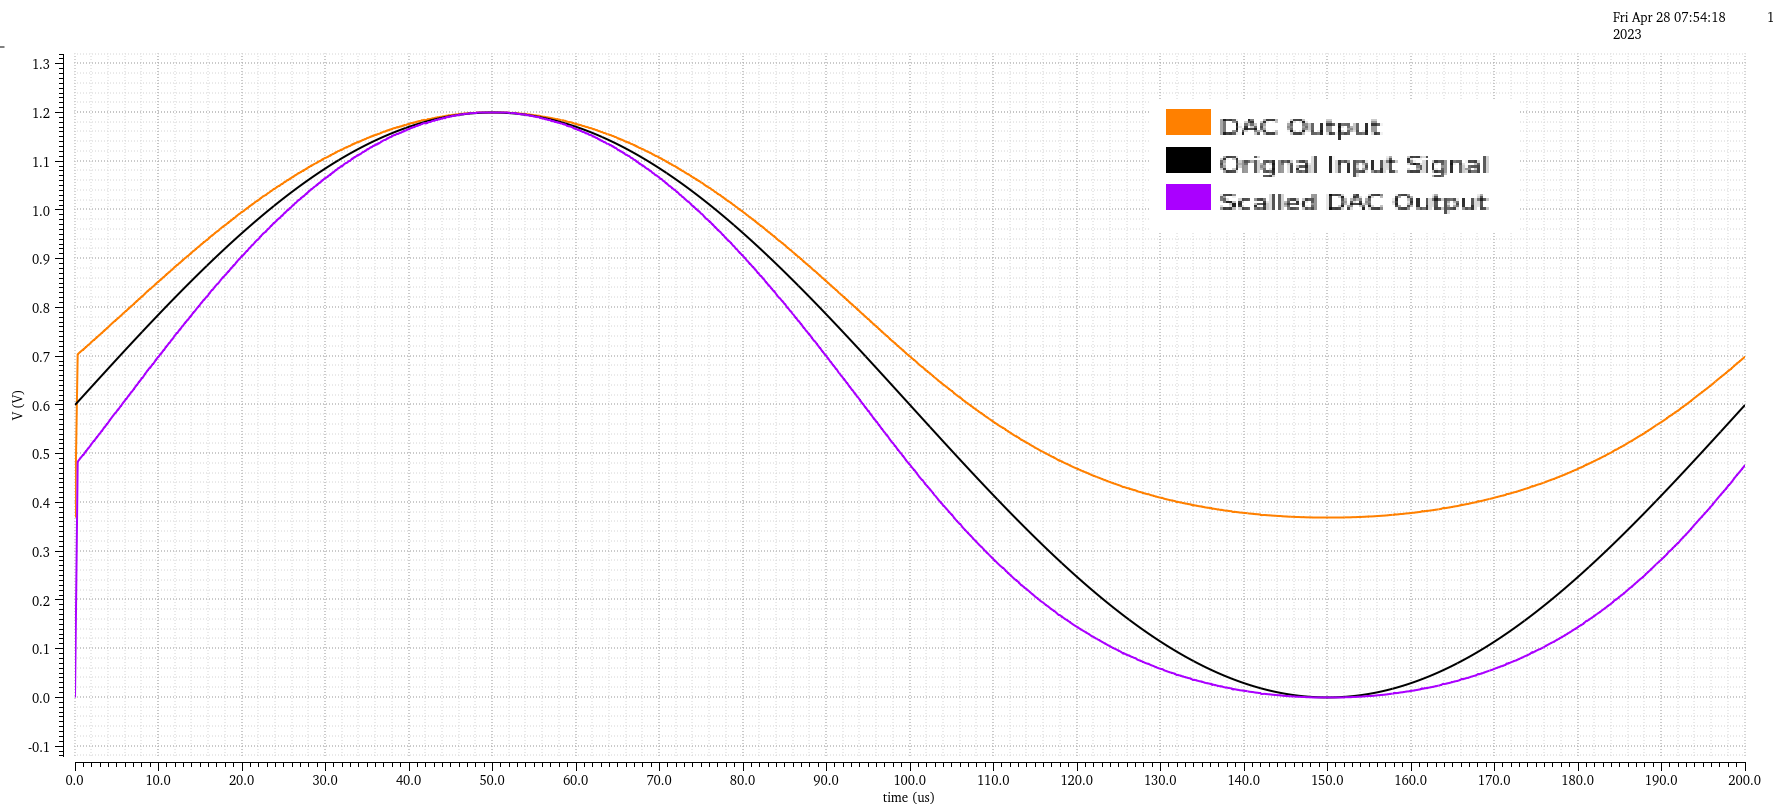

*Fig 19: DAC Output (Blue Trace) corresponding to Siusoidal Input (Black Trace)*

###**Corner Analysis for 10-bit Segmented Current Steering DAC**

In addition to above analysis, corner analysis to the input of ramp signal are performed. different outputs related to different corners are sketched in the following plot. the analysis was done on Virtuoso using TSMC 65nm PDK.

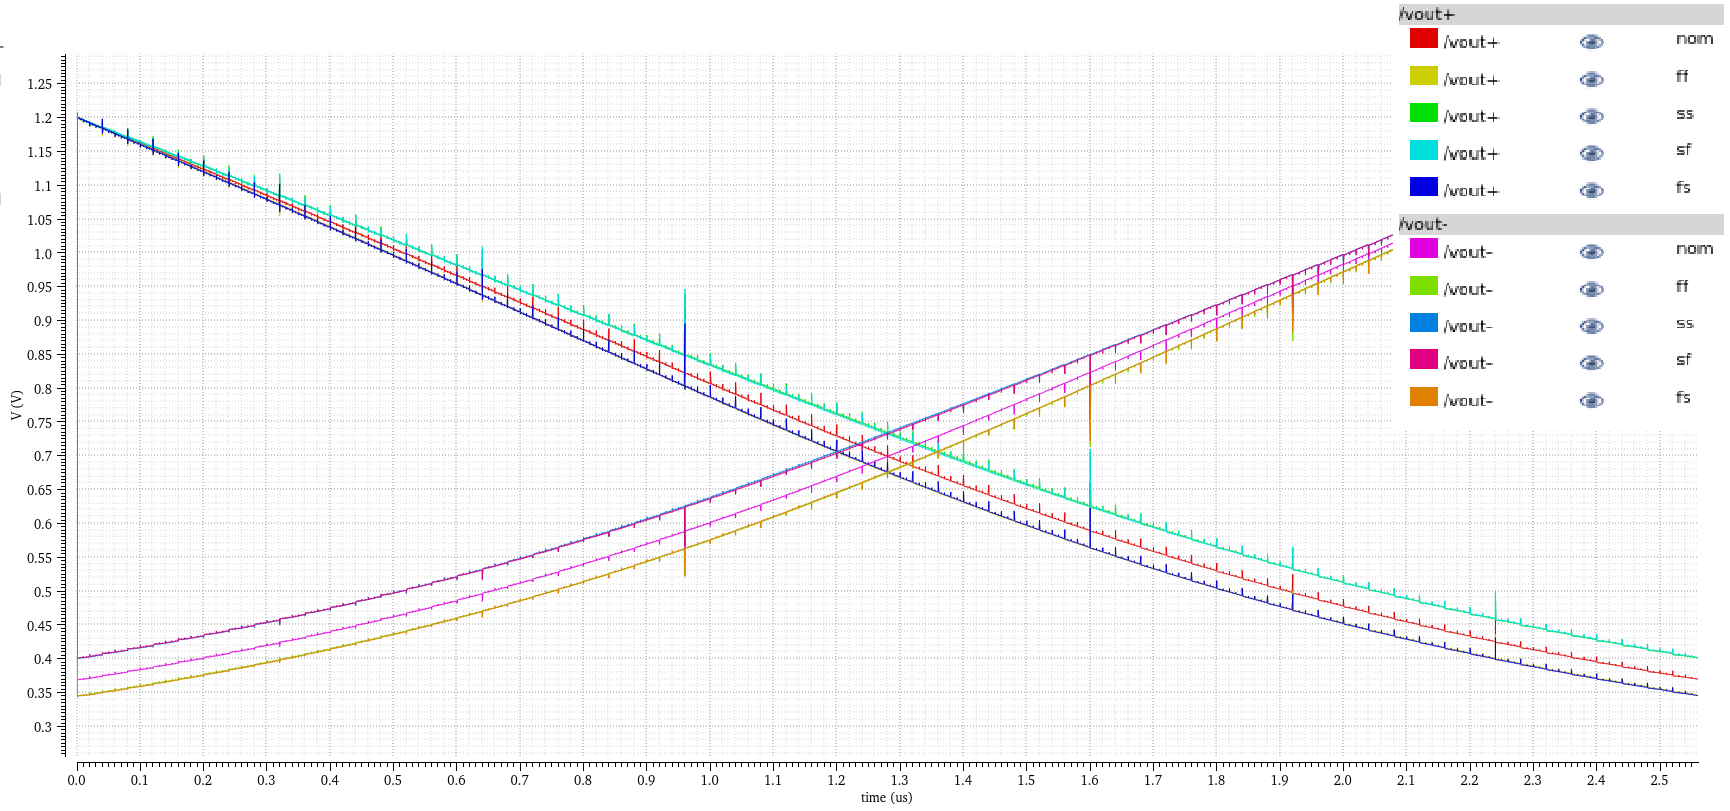

*Fig 20: Corner Analysis for DAC with ramp as input signal*

##**Simulation on XSCHEM (Opensource Tools)**

The design, after being succesfully simulated on 65nm PDKs on Virtuoso(Cadence) is implemented on XSCHEM. The implemented design is initially simulated for 6 bits in total, 3 MSBs implemented by thermometer decoder topology and the 3 LSBs implemented using the binary DAC architecture. The results is same as obtained in the simulation in the above sections. The Schemtaics and outputs for opensource tools are as follows:

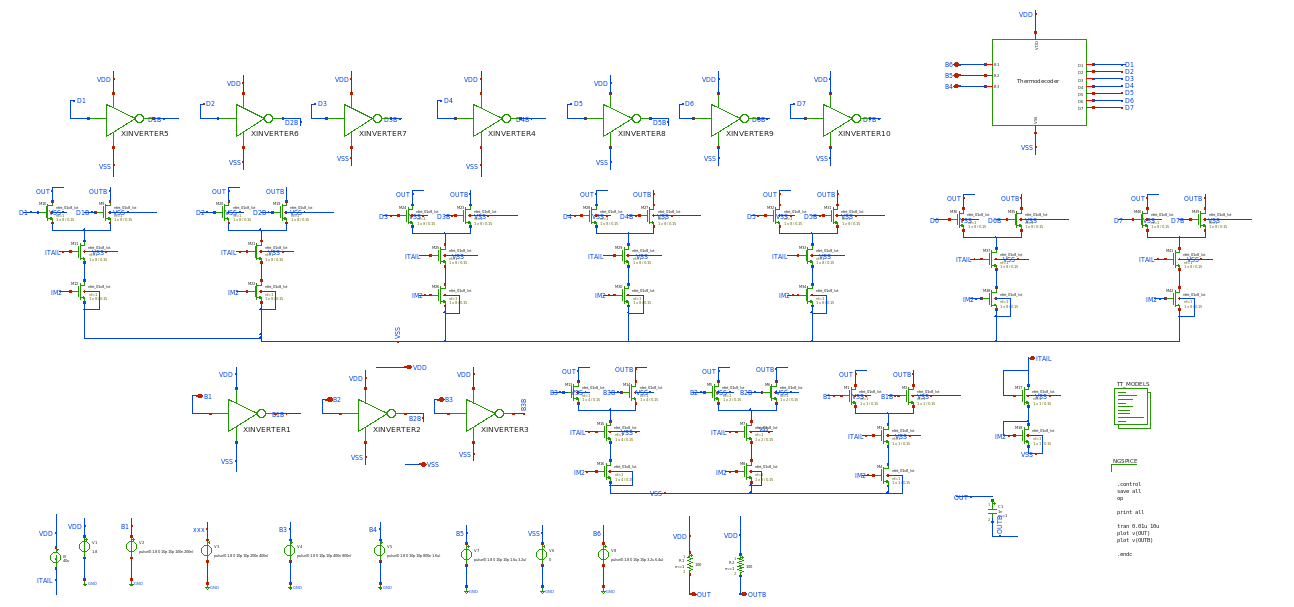

*Fig 21: Schematic for 6-bit DAC implemented on XSCHEM*

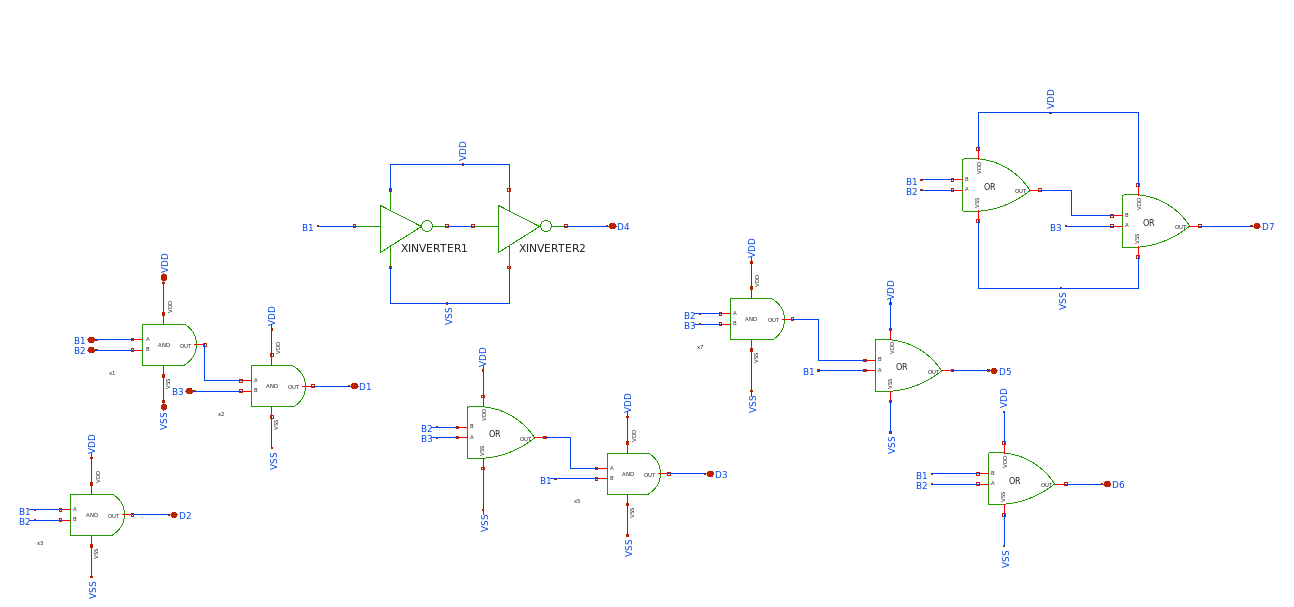

*Fig 22: Schematic for 3bit MSB implemented using thermometer decoder*

The output is as per expectations and all 64 levels are obtained as per calculation for 6bit DAC. The circuit is fed a ramp fashion input signal, the output obtained is follows:

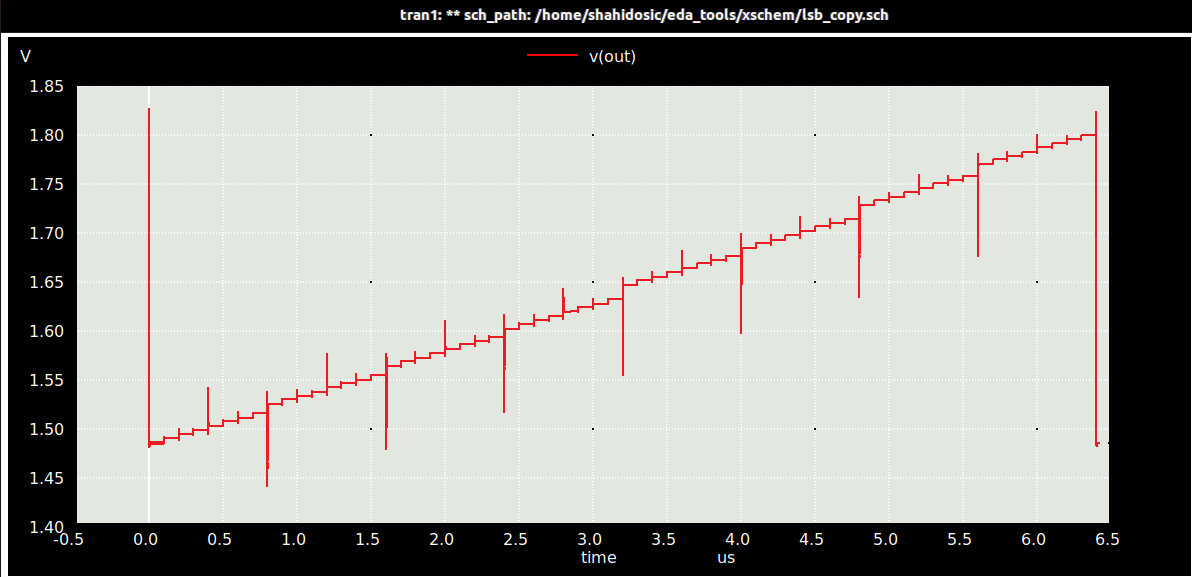

*Fig 23: Output for 6-bit DAC on XSCHEM*

##**Conclusion**

An implementation of a 10 bit segmented current steering DAC is presented in this proposal. The proposed solution is current steering DAC that meets the requirements of lesser area, speed of conversion, reduction in glitches, and nonlinearity errors. The design uses a combination of thermometer decoding technique and binary coding to implement MSBs and LSBs, respectively. The design also includes a bandgap voltage reference to provide a stable and accurate current reference to the DAC. The Local encoders for MSB switches are implemented using NAND standard logic gates resulting in less propagation delay time and higher operating frequency. The 10-bit segmented current steering DAC is synchronized, and the output currents from binary weighted and matrix cells are summed to generate the corresponding DAC output. The design is efficient, and the block diagram of the DAC is presented. This DAC design is designed and implemented on 65nm TSMC PDK and results are verified along with corner analysis. The design is also partially implemented on Opensource Tools for demonstration. We used **XSCHEM** and designed an initial 6-bit DAC based on same topology and verified the results. Now, this design is ready to be fully implemented on opensource tools as we have a hands-on experience on XSCHEM for further implementation.

##**References**



[1]   J. J. Patel and D. A. Naik, "COMPARATIVE STUDY OF CURRENT STEERING DAC BASED ON IMPLEMENTATION USING
VARIOUS TYPES OF SWITCHES," vol. 11, no. 04-04-2020, p. 9, 2020.

[2]   P. S. Abhari and F. R. , "High Speed 10 Bit Segmented Current Steering DAC," Iran, 2016.

[3]   B. D. Miser, Design of a Wide-Swing Cascode Beta Multiplier Current, Knoxville, 2003.

[4]   B. Razavi, "The Current-Steering DAC," 2018. [Online].

[5]   N. A. M. E. and P. C. S. , "Design and Simulation of 12-bit Current Steering DAC," INTERNATIONAL RESEARCH JOURNAL OF ENGINEERING AND TECHNOLOGY, vol. 6, no. 07-07-2019, p. 6, 2019.

[6]   S. S. and S. B. , "A 10-bit 500 MSPS Segmented DAC with optimized current sources toa void mismatch effect," 2015 IEEE Computer Society Annual Symposium on VLSI, p. 6, 2015.

[7]   H. A. D. M. C. and M. M. V. , "A 134-nW Single BJT Bandgap Voltage and Current Reference in 0.18-µm CMOS," p. 19, 22 september 2022.

[8]   A. Y. J. C. and H. M. , "An area-efficient 1.96 nA 0.55 V 96 ppm/◦C self-biased current reference using active resistor temperature coefficient compensation," International Journal of Electronics and Communications, p. 10.

[9]   T. Chen, "A 14-bit 200-MHz Current-Steering DAC With Switching-Sequence Post-Adjustment Calibration," SOLID- STATE CIRCUITS, vol. 42, no. 11-11-2107, p. 9, 2017.